## Step 3 - Climate Analysis and Exploration

In [1]:
import pandas as pd                                                          # pandas library

In [2]:
import numpy as np                                                           # numpy library

In [3]:
import matplotlib.pyplot as plt                                              # modules from matplotlib library

In [4]:
import seaborn as sns                                                        # seaborn library

In [5]:
import sqlalchemy                                                            # SQL Alchemy dependencies
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func, desc

In [6]:
import datetime                                                              # datetime library

In [7]:
sns.set()                                                                    # switches to seaborn default display

In [8]:
trip_start_date = '2018-07-01'                                               # selected trip start and end dates
trip_end_date = '2018-07-11'

In [9]:
engine = create_engine("sqlite:///hawaii.sqlite")                            # creates SQLite engine

In [10]:
Base = automap_base()                                                        # automaps and reflects database
Base.prepare(engine, reflect=True)

In [11]:
conn = engine.connect()                                                      # connects to database
inspector = inspect(engine)                                                  # initializes inspector

In [12]:
Base.classes.keys()                                                          # inspects database

['measurement', 'station']

In [13]:
Measurement = Base.classes.measurement                                       # creates class for each table
Station = Base.classes.station

In [14]:
session = Session(engine)                                                    # initializes session

### Precipitation Analysis

In [15]:
# queries the database for previous years precipitation data.
precip_analysis = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= "2016-08-24").\
    filter(Measurement.date <= "2017-08-23").all()

In [16]:
precip_df = pd.DataFrame(precip_analysis)                                    # loads query results => dataframe

In [17]:
# converts date to datetime object - Necessary for proper sorting of plot. See improper sort in README.md.
precip_df['date'] = pd.to_datetime(precip_df['date'])

In [18]:
precip_df = precip_df.set_index('date')                                      # reindexes dataframe by date
precip_df.rename(columns = {'prcp': 'precipitation'}, inplace=True)          # renames column for legend
precip_df.head()

,precipitation
date,
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
2016-08-28,0.01


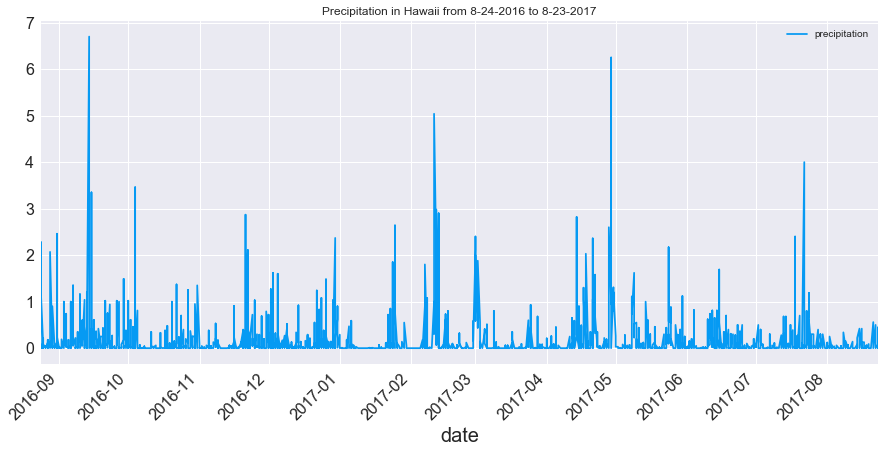

In [19]:
precip_df.plot(figsize=(15, 7),                                              # plots the data
               sort_columns=True, 
               rot=45, 
               use_index=True, 
               title='Precipitation in Hawaii from 8-24-2016 to 8-23-2017', 
               legend=True,
               fontsize=16,
               grid=True,
               color='xkcd:azure'
              )

plt.xlabel('date', fontsize=20)
plt.show()

In [20]:
precip_df.describe()                                                         # summary statistics

,precipitation
count,2223.000000
mean,0.159951
std,0.441220
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,6.700000


### Station Analysis

In [21]:
station_count = session.query(Station.id).count()                            # counts number of stations
print(f'There are {station_count} weather stations in Hawaii.')

There are 9 weather stations in Hawaii.


In [22]:
# finds station activity and sorts from most active to least active.
station_activity = session.query(Measurement.station, Station.name, func.count(Measurement.tobs)).\
filter(Measurement.station == Station.station).group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc()).all()

In [23]:
station_activity                                                             # displays station activity

[('USC00519281', 'WAIHEE 837.5, HI US', 2772),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 2724),
 ('USC00513117', 'KANEOHE 838.1, HI US', 2709),
 ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 2669),
 ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 2612),
 ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 2202),
 ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 1979),
 ('USC00517948', 'PEARL CITY, HI US', 1372),
 ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 511)]

In [24]:
station_activity[0]                                                          # displays most active station

('USC00519281', 'WAIHEE 837.5, HI US', 2772)

In [25]:
for row in reversed(station_activity):                                       # extracts station with most activity
    most_active_station=row.station
    most_active_name=str(row.name)

In [26]:
# finds tobs for most active station
most_active_station_tobs = session.query(Measurement.tobs).\
filter(Measurement.station == most_active_station, Measurement.station == Station.station,\
       Measurement.date >="2016-08-24", Measurement.date <="2017-08-23").all()

In [27]:
temperatures = [temp[0] for temp in most_active_station_tobs]                # extracts temperatures from query

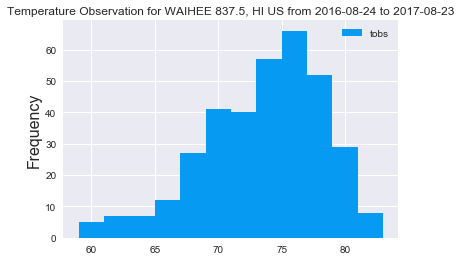

In [28]:
plt.hist(temperatures, bins=12, color='xkcd:azure')                          # plots the data
plt.title("Temperature Observation for %s from 2016-08-24 to 2017-08-23" % (most_active_name))
plt.ylabel('Frequency', fontsize=16)
labels = ['tobs']
plt.legend(labels)
plt.show()

### Temperature Analysis

In [29]:
def calc_temps(start, end):
    """ function calc_temps
        parameters: start (string), end (string)
        returns: list
        extracts data using a SQL Alchemy query and returns list
        of avg temperature, lowest temperature, highest temperature
    """
    temp_list = []
    query = session.query(Measurement.tobs).filter(Measurement.date>=start, Measurement.date<=end).all()
    temperatures = [temp[0] for temp in query]
    temp_list.append(np.mean(temperatures))
    temp_list.append(min(temperatures))
    temp_list.append(max(temperatures))
    
    return temp_list

In [30]:
def get_prev_year_date(target):
    """ function get_prev_year_date
        parameters: target (string)
        returns: string
        disassembles string and subtracts 1 from year portion
        returns parameter input on error
    """
    try:
        xl = target.split('-')
        xc = (str(int(xl[0])-1)) + '-' + xl[1] + '-' + xl[2]
        return xc
    except:
        return target

In [31]:
start_conv = get_prev_year_date(trip_start_date)                             # gets previous year start and end dates
end_conv = get_prev_year_date(trip_end_date)

In [32]:
temp_list = calc_temps(start_conv, end_conv)                                 # calls calc_temps to get plot data

In [33]:
temp_list                                                                    # displays list of plot data

[78.030303030303031, 69, 87]

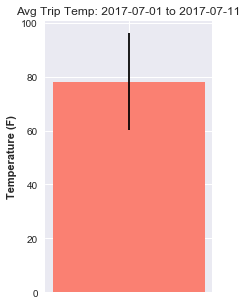

In [34]:
plt.figure(figsize=(3,5))                                                    # plots data
plt.bar(1, temp_list[0], yerr=(temp_list[2] - temp_list[1]), tick_label='', color='salmon')
plt.ylabel("Temperature (F)", weight="bold")
plt.title("Avg Trip Temp: %s to %s" % (start_conv, end_conv))
plt.show()

### Optional Recommended Analysis

In [35]:
# calculates the rainfall per weather station using the previous year's matching dates.
station_rainfall = session.query(Measurement.station, Station.name, func.sum(Measurement.prcp).label('precipitation')).\
filter(Measurement.station == Station.station, Measurement.date >= start_conv, Measurement.date <= end_conv).\
group_by(Measurement.station).order_by(func.sum(Measurement.prcp).desc()).all()

In [36]:
rainfall_df = pd.DataFrame(station_rainfall)                                 # loads query results => dataframe

In [37]:
rainfall_df = rainfall_df.set_index('station')                               # reindexes dataframe by date
del rainfall_df['name']                                                      # drops name column

In [38]:
rainfall_df                                                                  # displays dataframe

,precipitation
station,
USC00516128,1.36
USC00519281,0.79
USC00513117,0.41
USC00519397,0.12
USC00514830,0.06
USC00519523,0.02
USC00517948,0.00


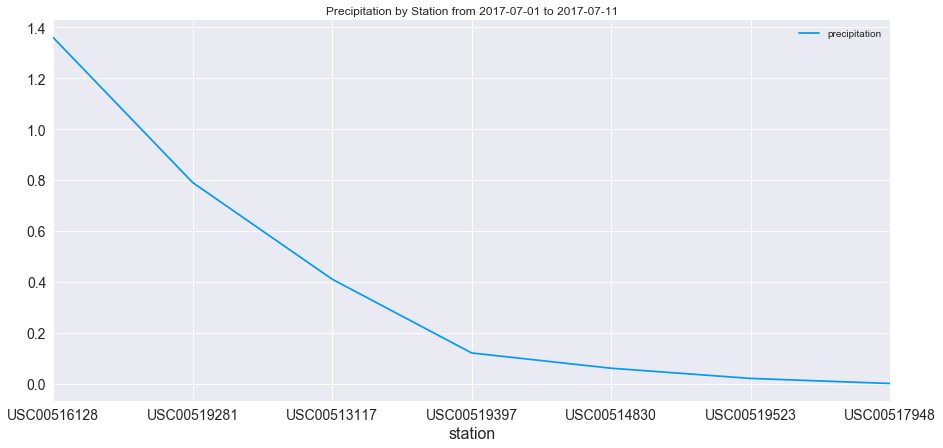

In [39]:
rainfall_df.plot(figsize=(15, 7),                                            # plots the data
               sort_columns=True, 
               use_index=True, 
               title='Precipitation by Station from %s to %s' % (start_conv, end_conv), 
               legend=True,
               fontsize=14,
               grid=True,
               color='xkcd:azure'
              )

plt.xlabel('station', fontsize=16)
plt.show()

#### Calculate the daily normals. Normals are the averages for min, avg, and max temperatures.

In [40]:
def get_pdate(target):
    """ function get_pdate 
        parameters: target (string)
        returns: string
        splits input string in date format and returns
        partial date in %m-%d format.
    """
    target_parse = target.split('-')
    return target_parse[1] + '-' + target_parse[2]

In [41]:
def daily_normals(target_date):
    """ function daily_normals
        parameters: target_date (string)
        returns: list
        extracts data using a SQL Alchemy query and returns list
        of averages of min, avg, and max temperature.
    """
    temp_list = []
    query = session.query(Measurement.tobs).filter(Measurement.date.like('%' + get_pdate(target_date))).all()
    temperatures = [temp[0] for temp in query]
    temp_list.append(target_date)
    temp_list.append(min(temperatures))
    temp_list.append(np.mean(temperatures))
    temp_list.append(max(temperatures))
    
    return temp_list

In [42]:
def get_date_list(start_date, end_date):
    """ function get_date_list
        parameters: start_date (string), end_date (string)
        returns: list
        extracts all dates between start_date and end_date
        and returns dates in %Y-%m-%d format.
    """
    date_list = []
    
    tsds = start_date.split('-')
    teds = end_date.split('-')
    
    begin = datetime.date(int(tsds[0]), int(tsds[1]), int(tsds[2]))
    end = datetime.date(int(teds[0]), int(teds[1]), int(teds[2]))

    next_day = begin
    while True:
        if next_day > end:
            break
        date_list.append(str(next_day))
        next_day += datetime.timedelta(days=1)
    
    return date_list

In [43]:
target_date_list = get_date_list(start_conv, end_conv)                       # gets target date list

In [44]:
data_list = []                                                               # initializes empty list
for item in target_date_list:
    data_list.append(daily_normals(item))    

In [45]:
# creates dataframe from list data
daily_normals_df = pd.DataFrame(data_list, columns=['date','tmin', 'tavg', 'tmax'])
daily_normals_df = daily_normals_df.set_index('date')                        # reindexes dataframe by date

In [46]:
daily_normals_df                                                             # displays dataframe

,tmin,tavg,tmax
date,,,
2017-07-01,67,74.777778,81
2017-07-02,68,75.403846,82
2017-07-03,68,75.320755,87
2017-07-04,70,76.571429,81
2017-07-05,66,75.000000,81
2017-07-06,69,75.000000,81
2017-07-07,69,74.910714,82
2017-07-08,69,76.083333,83
2017-07-09,68,76.192982,83


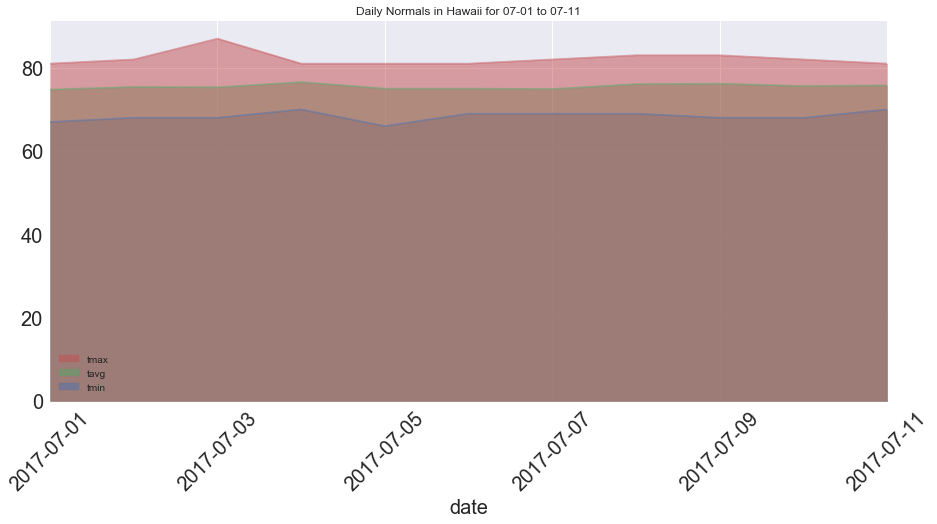

In [47]:
daily_normals_df.plot(figsize=(15, 7),                                       # plots the data
                      kind='area',
                      sort_columns=True, 
                      rot=45, 
                      use_index=True, 
                      title='Daily Normals in Hawaii for %s to %s' % (get_pdate(start_conv), get_pdate(end_conv)), 
                      stacked=False,
                      legend='reverse',
                      fontsize=20,
                      grid=True,
                     ) 

plt.xlabel('date', fontsize=20)
plt.show()